### EDA-4. СТАТИСТИЧЕСКИЕ ТЕСТЫ (HW-03)

Задание 1.<br> Объедините два массива в DataFrame.

In [21]:
# Создадим DataFrame через словари

import pandas as pd

# восьмое значение в spb - среднее значение по spb
df = pd.DataFrame({'spb': [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105, 0.1034],
 'mgd' : [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]})
df

,spb,mgd
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,0.1034,0.0689


Задание 2.<br>Обоснуйте выбор теста на корреляцию.

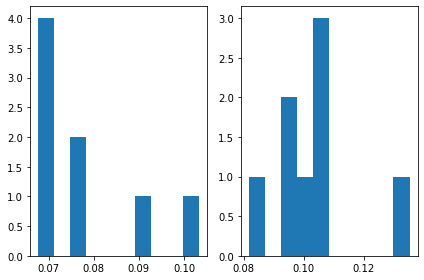

In [38]:
# Выбираем метод корреляции

import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
plt.hist(df['mgd'], label='mgd') # гистограмма распределения признака

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['spb'], label='spb') # гистограмма распределения признака

plt.tight_layout() # чтобы графики не перекрывали другу на друга, используем tight_layout

plt.show() # просмотр графика

Признаки не имеют нормального наспределения

In [28]:
# Корреляцию проведем по методу Спирмена т.к. иногда его можно применять для числовых переменных с ненормальным распределением
#df.corr()
df.corr(method='spearman')

,spb,mgd
spb,1.000000,0.166667
mgd,0.166667,1.000000


Связь отсутствует

Задание 3.<br> Сделайте вывод по гипотезе<br>Задание 4.<br>Проводим тест на сравнение выборок

In [40]:
# Т.к. сравниваем две группы (выборки )и количество объектов в выборке менее 30 и также зависимая переменная количественная,
# то сравнения средних значений будем использовать Т-тест.

from scipy.stats import ttest_ind

# Формируем нулевую и альтернативную гипотезы
H0 = 'Нет значимой разницы между средним размером раковины мидий в Петербурге и Магадане.'
Ha = 'Есть значимая разница между средним размером раковины мидий в Петербурге и Магадане.'

# Зададим значение статистической значимости 5%
alpha = 0.05
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(df['spb'], df['mgd'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(df)



*** Результаты независимого T-теста ***
0.0 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий в Петербурге и Магадане.
